#**SENTIMENT ANALYSIS OF TWEETS USING VARIOUS MACHINE LEARNING TECHNIQUES**

Sentiment Analysis, or Emotion AI is a natural language processing (NLP) approach that involves determining the sentiment or emotional tone expressed in a piece of text.

The objective is to categorize text in an automatic manner according to positive, negative, neutral, or occasionally more complex emotional states like joy, sadness, anger, or surprise.

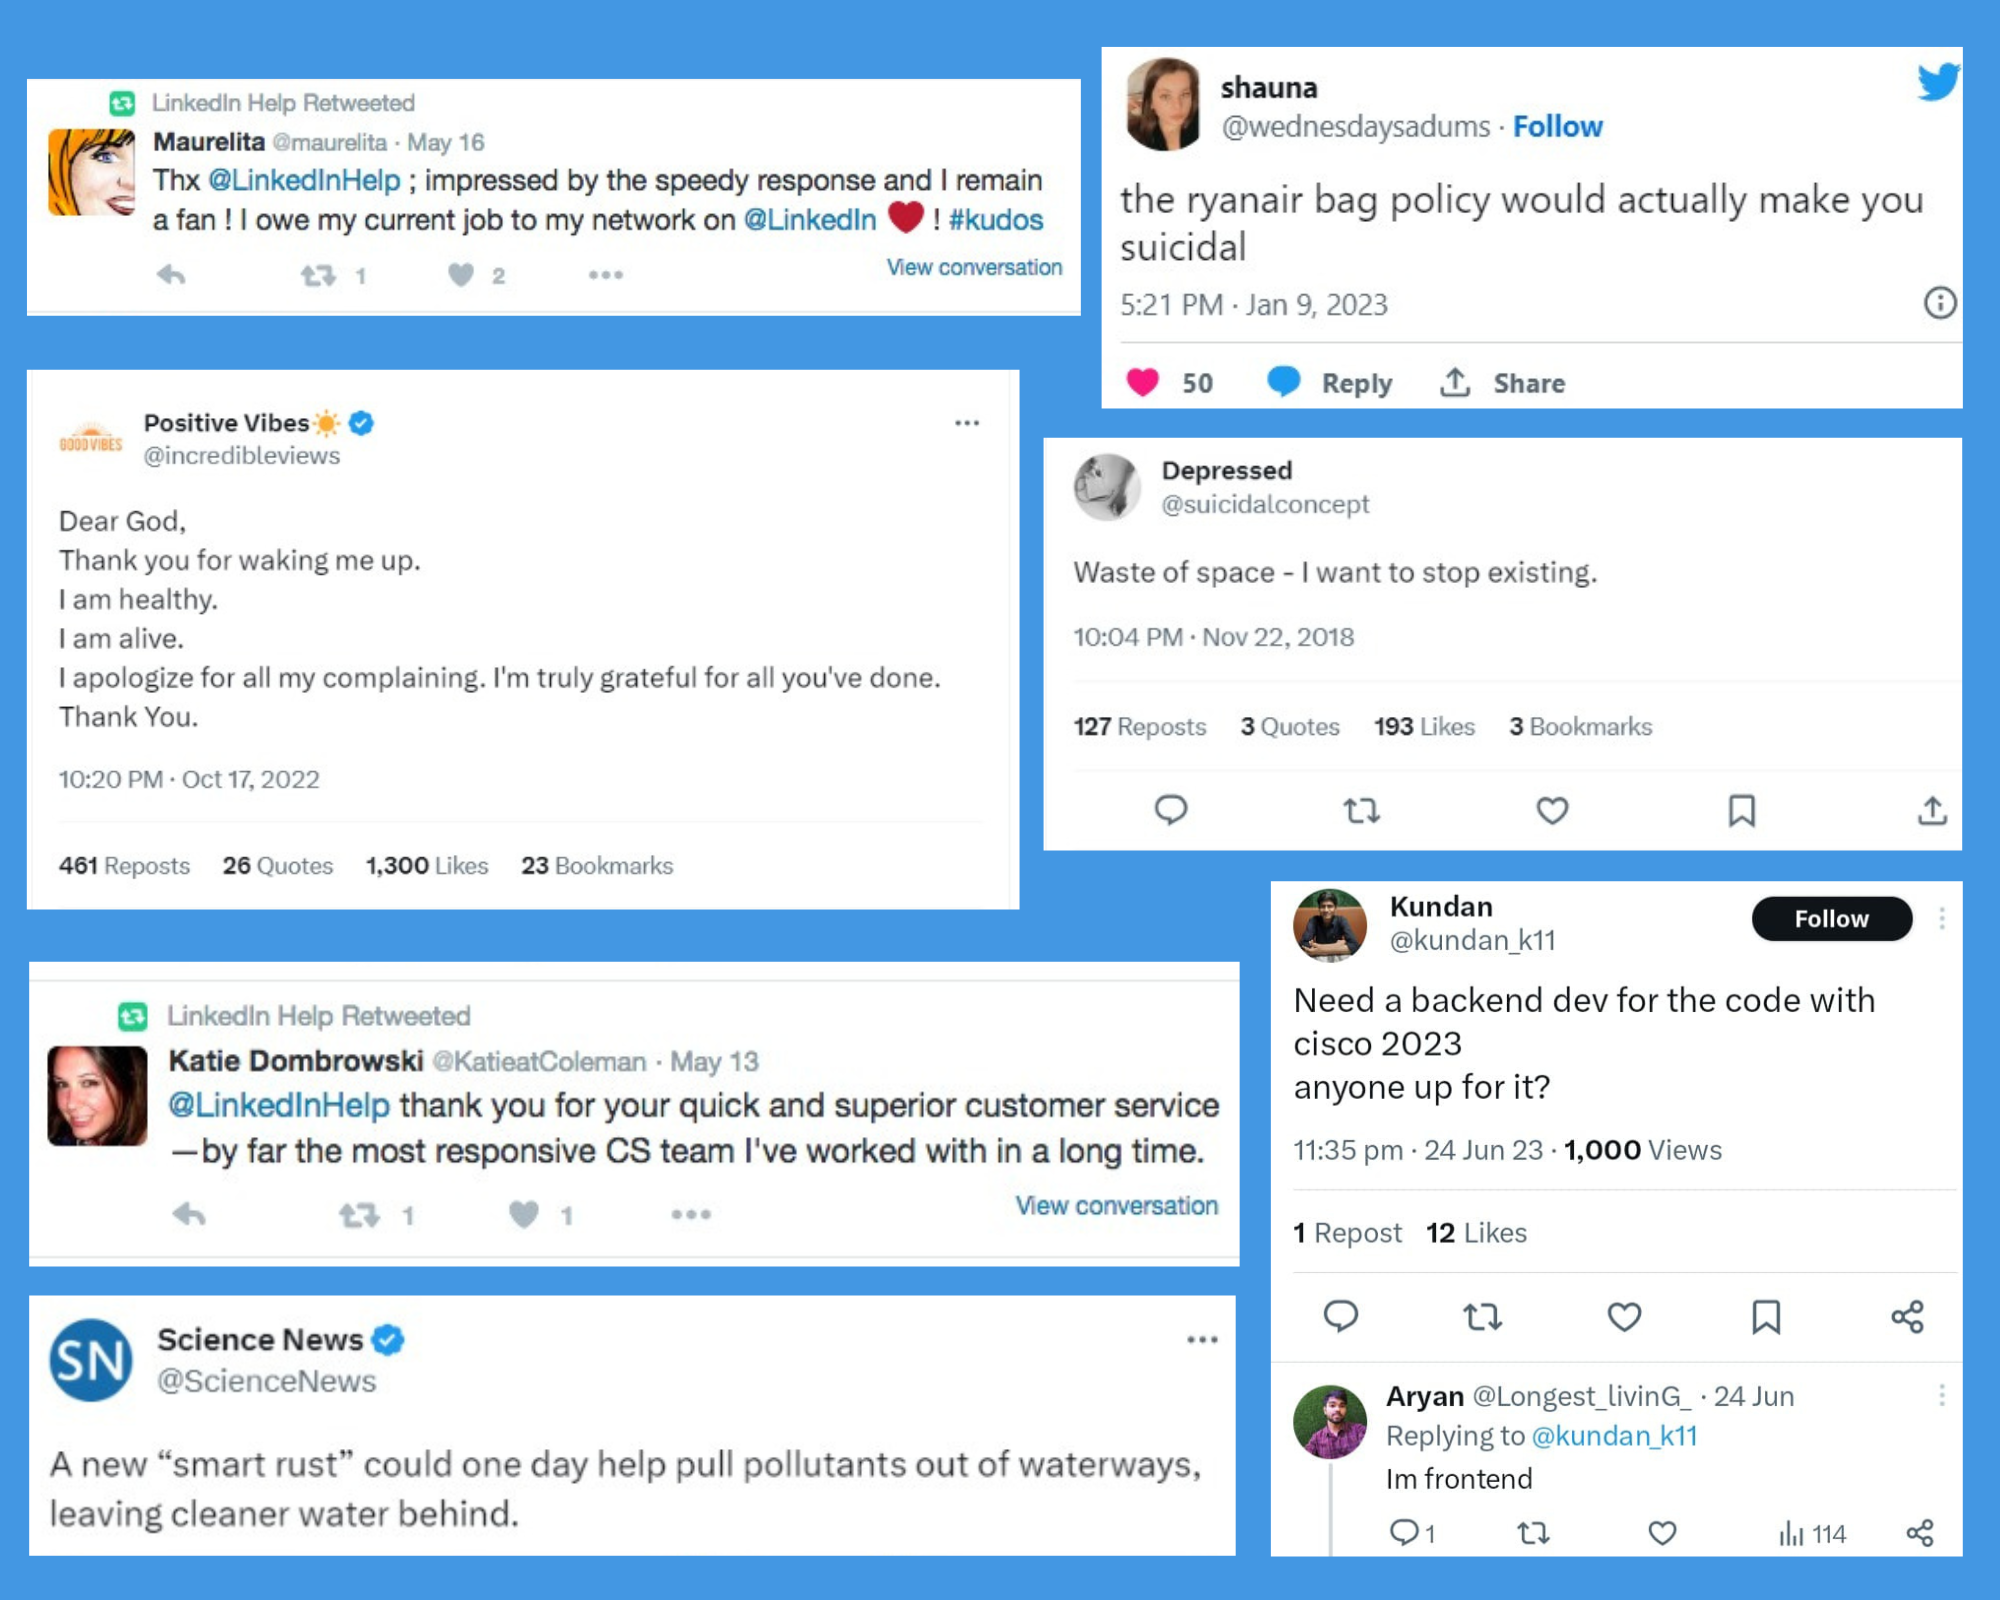

**Importing the libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None
import os #File location

from wordcloud import WordCloud #Word visualization
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
from sklearn.metrics import classification_report

import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Reading data from a CSV file**

In [ ]:
train=pd.read_csv('twitter_training.csv')
val = pd.read_csv('twitter_validation.csv')

In [ ]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
15831,3108,Dota2,Negative,She wtf
15832,3108,Dota2,Negative,wtf
15833,3109,Dota2,Irrelevant,ICYMI: @BLASTDota finds sponsor in @KITKAT. . ...
15834,3109,Dota2,Irrelevant,ICYMI: @ BLASTDota finds sponsor in @ KITKAT. ...


In [ ]:
val_data=val
val_data

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


**Performing Exploratory Data Analysis**

In [ ]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

The above-mentioned code takes text data from the "text" columns of the train_data and val_data DataFrames,then converts the text to lowercase, and at last applies a regular expression to remove all characters that are not letters, digits, or spaces, effectively cleaning the text for further processing.

In [ ]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


**Generating a word cloud of the most frequent words in the sentiment text data and displaying it**

WordCloud is a library used to create visual representations of text data, where each word's size in the visualisation corresponds to how frequently it appears in the text.

In the following code, we created a word cloud visualization from the "lower" text data of positive,negative,irrelevant and neutral class instances in the train_data DataFrame. The resulting word cloud displays the most frequent words in the positive class's text data, where word size are in tune with the word frequency.




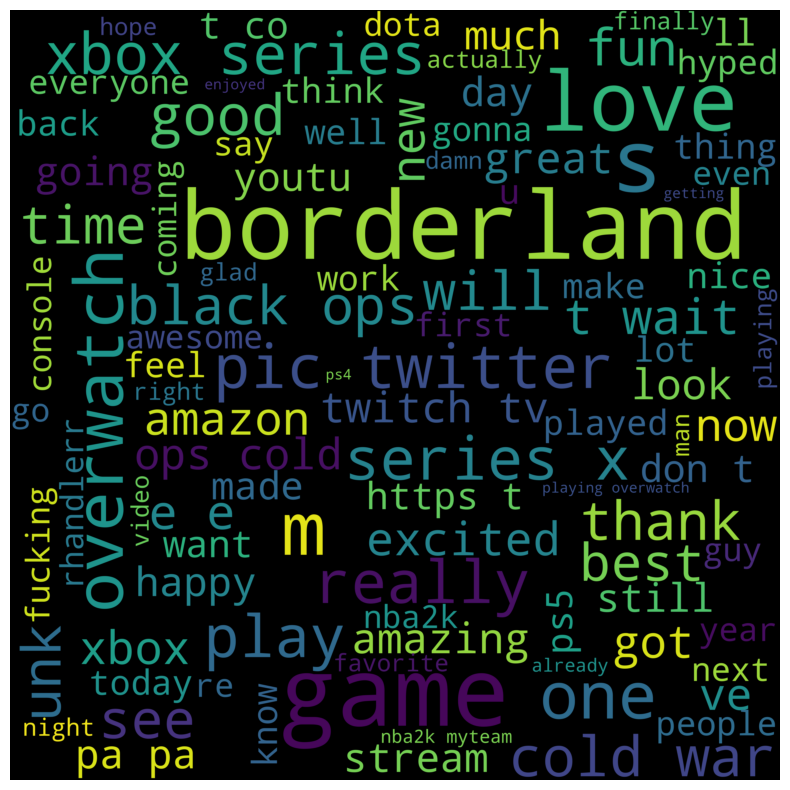

In [ ]:
#For positive sentiments
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

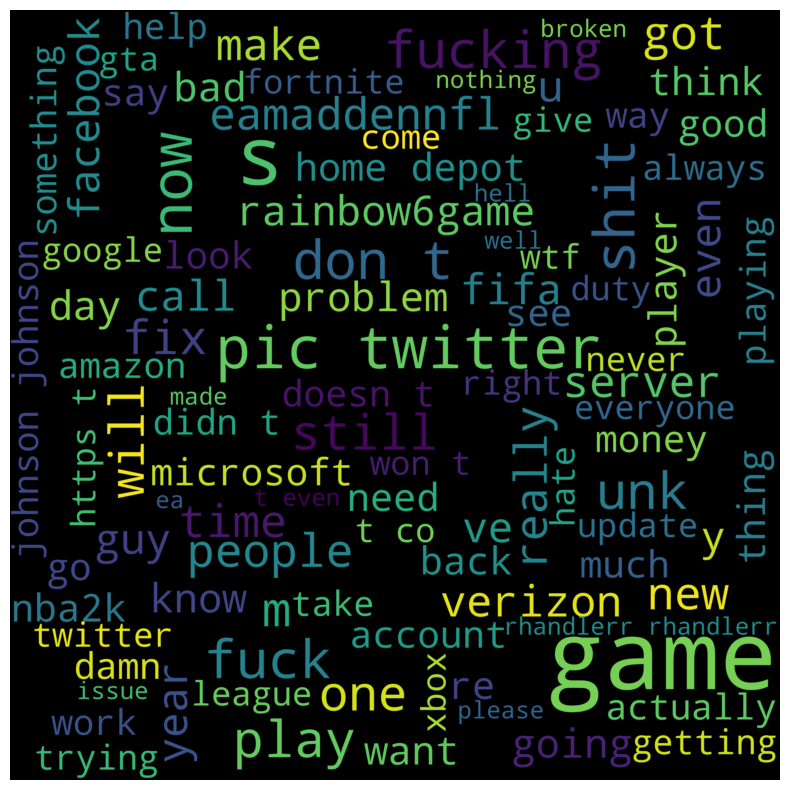

In [ ]:
#For Negative sentiments
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

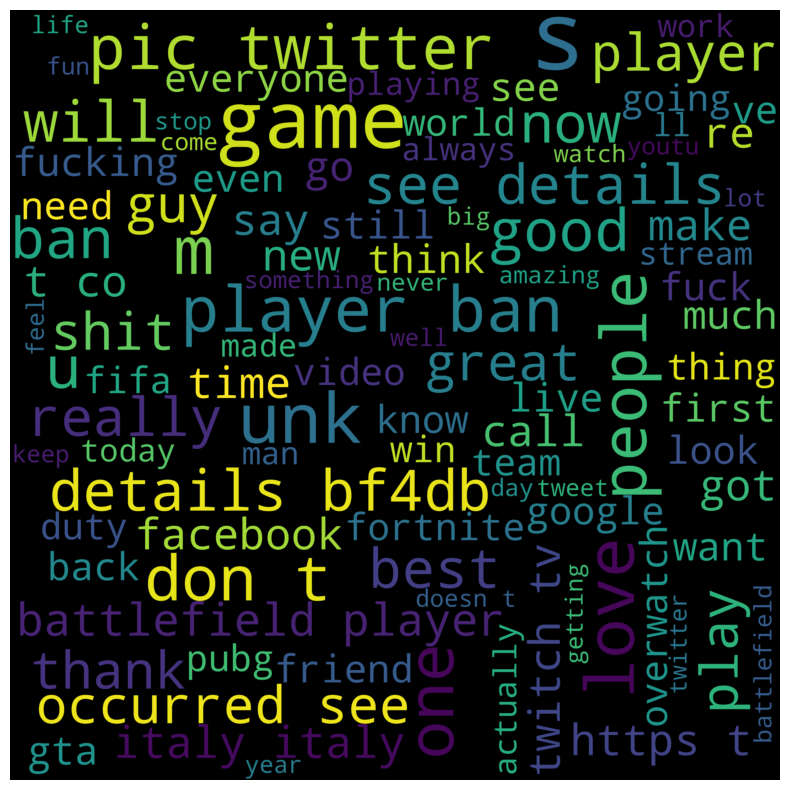

In [ ]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

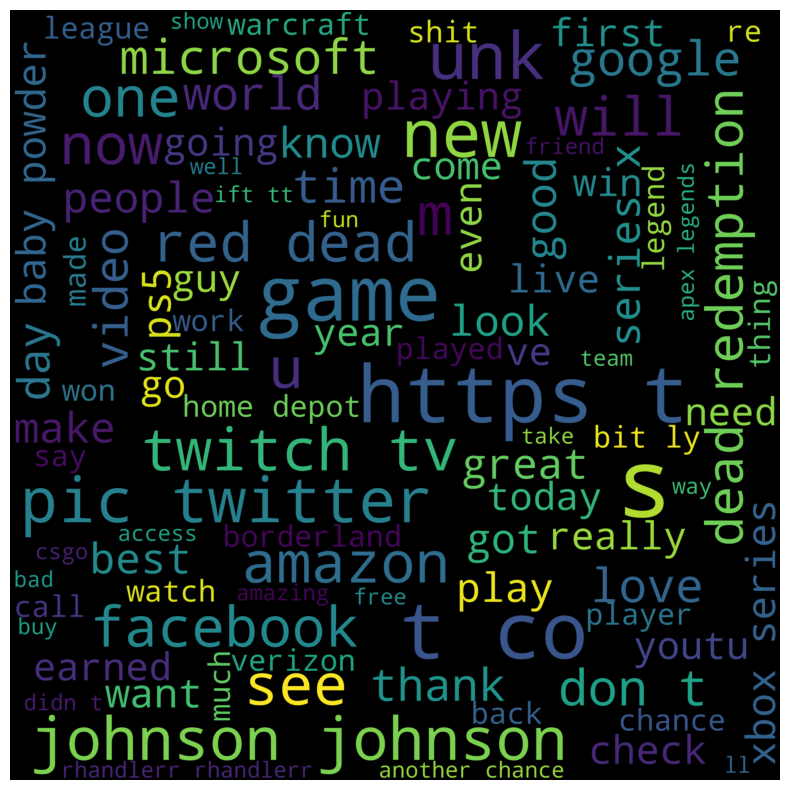

In [ ]:
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Count information per category
plot1=train.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,Borderlands,Irrelevant,240,240,240


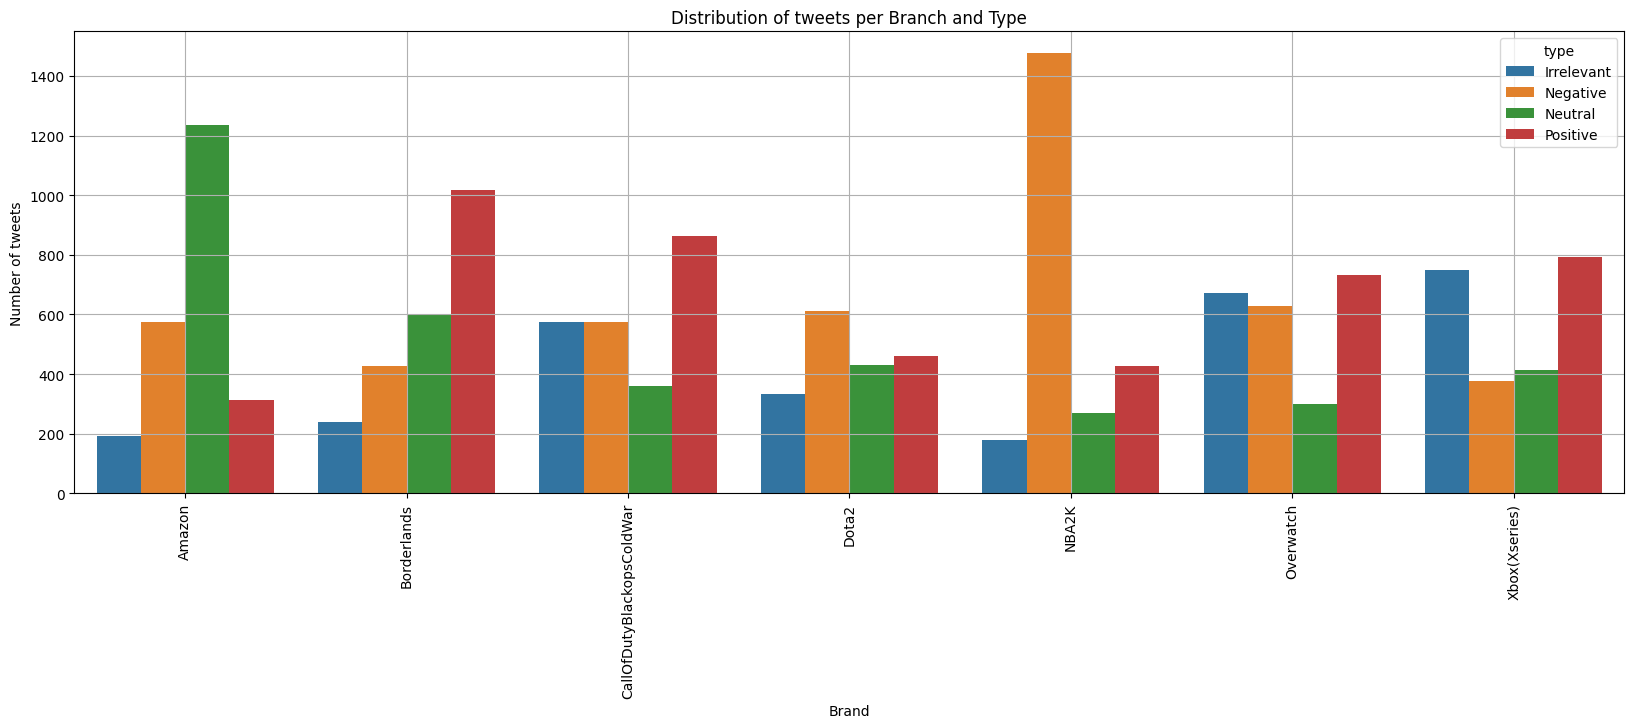

In [ ]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

NLTK is a widely used library for working with human language data, such as text analysis, tokenization, and more.The 'punkt' resource includes pre-trained models and data for tokenization, particularly for sentence and word tokenization. The 'punkt' resource is required by the word_tokenize function to tokenize text into words.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  11135


The above  method initially tokenizes the text data in the train_data DataFrame's "lower" column before computing and printing the total number of unique tokens discovered. Understanding the vocabulary size and complexity of the text data is aided by this.

In [ ]:
tokens_text[1]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [ ]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

Stopwords are common words that are often removed from text data during text preprocessing because they typically do not carry significant meaning for analysis.

A list of English stopwords is obtained using the NLTK corpus and stored in the stop_words variable using the code snippet. Before carrying out several activities involving natural language processing, this list can be used for text preprocessing to eliminate frequent and uninformative words. The list's first five stopwords are printed in the final line.

In [ ]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [ ]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [ ]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [ ]:
X_test_bow

<3168x10407 sparse matrix of type '<class 'numpy.int64'>'
	with 32739 stored elements in Compressed Sparse Row format>

In [ ]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [ ]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.297348
Positive      0.289457
Neutral       0.224432
Irrelevant    0.188763
Name: type, dtype: float64

In [ ]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [ ]:
X_val_bow

<999x10407 sparse matrix of type '<class 'numpy.int64'>'
	with 10790 stored elements in Compressed Sparse Row format>

In [ ]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
X_train_bow

<12668x317724 sparse matrix of type '<class 'numpy.int64'>'
	with 854089 stored elements in Compressed Sparse Row format>

# **Model 1 - LOGISTIC REGRESSION**

- Logistic Regression is a statistical model used for
classification.
- During training, the model adjusts the weights to minimize the difference between the predicted probabilities and the actual class labels in the training data.
- Logistic Regression assumes a linear relationship between features and log-odds of the positive class.

In [ ]:
model2 = LogisticRegression(C=5, solver="liblinear",max_iter=500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)

LogisticRegression(C=5, max_iter=500, solver='liblinear')

In [ ]:
print("Logistic Regression")
train_pred_2 = model2.predict(X_train_bow)
print("Training Accuracy: ", accuracy_score(y_train_bow, train_pred_2) * 100)

y_val_bow = val_data['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Validation Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

# Prediction
test_pred_1 = model2.predict(X_test_bow)
accuracy1 = accuracy_score(y_test_bow, test_pred_1) * 100
print("Testing Accuracy: ", accuracy1)

Logistic Regression
Training Accuracy:  97.71866119355857
Validation Accuracy:  57.35735735735735
Testing Accuracy:  92.61363636363636


In [ ]:
class_report1 = classification_report(y_test_bow, test_pred_1)

print("Classification Report:\n", class_report1)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.91      0.88      0.90       598
    Negative       0.94      0.95      0.94       942
     Neutral       0.97      0.90      0.93       711
    Positive       0.90      0.95      0.92       917

    accuracy                           0.93      3168
   macro avg       0.93      0.92      0.92      3168
weighted avg       0.93      0.93      0.93      3168



# **Model 2 - XGBoost**

- XGBoost, short for Extreme Gradient Boosting, is a powerful and popular machine learning algorithm that belongs to the family of boosting methods.
- It combines gradient boosting and optimization techniques to create robust predictive models.
- It's widely used for a variety of machine learning tasks, including classification, regression, and ranking problems.

In [ ]:
le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train_bow)
y_test_bow_num=le.transform(y_test_bow)
y_val_bow_num=le.transform(y_val_bow)

In [ ]:
%%time
XGB=XGBClassifier(objective="multi:softmax",n_estimators=300,colsample_bytree=0.9, subsample=0.9)
XGB.fit(X_train_bow, y_train_bow_num)


CPU times: user 1h 3min 32s, sys: 6.15 s, total: 1h 3min 38s
Wall time: 37min 27s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [ ]:
# Prediction
test_pred_2 = model2.predict(X_test_bow)
accuracy2 = accuracy_score(y_test_bow, test_pred_2) * 100
print("XGBoost Testing Accuracy: ", accuracy2)


XGBoost Testing Accuracy:  91.705367750297


In [ ]:
class_report2 = classification_report(y_test_bow, test_pred_2)

print("Classification Report:\n", class_report2)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.96      0.88      0.91      1831
    Negative       0.94      0.92      0.93      2463
     Neutral       0.91      0.91      0.91      2316
    Positive       0.88      0.94      0.91      2649

    accuracy                           0.92      9259
   macro avg       0.92      0.91      0.92      9259
weighted avg       0.92      0.92      0.92      9259



# **Model 3 - Random Forest**

- It combines the strengths of multiple decision trees to make accurate predictions.
- It's particularly effective for classification and regression tasks.
- For classification, the final prediction is determined by a majority vote among the decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier()

# Fit the classifier to the training data
model3.fit(X_train_bow, y_train_bow_num)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
test_pred_3 = model3.predict(X_test_bow)
accuracy3 = accuracy_score(y_test_bow_num, test_pred_3) * 100
print("Random Forest Testing Accuracy: ", accuracy3)


Random Forest Testing Accuracy:  89.69825381749105


In [ ]:
class_report3 = classification_report(y_test_bow_num, test_pred_3)

print("Classification Report:\n", class_report3)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      2456
           1       0.88      0.94      0.91      4242
           2       0.89      0.90      0.89      3298
           3       0.88      0.92      0.90      3691

    accuracy                           0.90     13687
   macro avg       0.91      0.89      0.89     13687
weighted avg       0.90      0.90      0.90     13687



# **Model 4 - Support Vector Machine**

- Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm used for both classification and regression tasks.
- SVM aims to find a hyperplane that best separates the data into different classes.
- SVM can use kernel functions to transform the input features into a higher-dimensional space where linear separation is possible.
- Support vectors are the data points that are closest to the decision boundary, and they play a crucial role in determining the optimal hyperplane.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Drop rows with NaN values in the 'text' column
train = train.dropna(subset=['text'])

X_train, X_test, y_train, y_test = train_test_split(train['text'],train['type'], test_size = 0.2, random_state = 42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
svm_preds = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM classifier
accuracy4 = accuracy_score(y_test, svm_preds)
print("SVM Accuracy: ", accuracy4)

SVM Accuracy:  0.7559432933478735


In [ ]:
class_report4 = classification_report(y_test, svm_preds)

print("Classification Report:\n", class_report4)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.74      0.64      0.69      1733
    Negative       0.76      0.81      0.79      2427
     Neutral       0.79      0.71      0.75      2285
    Positive       0.73      0.81      0.77      2725

    accuracy                           0.76      9170
   macro avg       0.76      0.75      0.75      9170
weighted avg       0.76      0.76      0.75      9170



# **Model 5 - Naive Bayes**

- Multinomial Naive Bayes is a variant of the Naive Bayes algorithm specifically designed for text classification tasks.
- It assumes that features represent the frequencies of words or tokens in a document, making it suitable for dealing with text data.
- This algorithm is commonly used in tasks like sentiment analysis, spam detection, and topic classification.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the Naive Bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
nb_preds = nb_classifier.predict(X_test_tfidf)

# Evaluate the Naive Bayes classifier
accuracy5 = accuracy_score(y_test, nb_preds)
print('Multinomial Naive Bayes Accuracy: ', accuracy5)

Multinomial Naive Bayes Accuracy:  0.667175572519084


In [ ]:
class_report5 = classification_report(y_test, nb_preds)

print("Classification Report:\n", class_report5)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.80      0.38      0.52      1733
    Negative       0.67      0.79      0.72      2427
     Neutral       0.72      0.57      0.64      2285
    Positive       0.61      0.82      0.70      2725

    accuracy                           0.67      9170
   macro avg       0.70      0.64      0.64      9170
weighted avg       0.69      0.67      0.66      9170



# **Ensemble Method**

- Ensemble methods are machine learning techniques that combine the predictions of multiple individual models (base learners) to improve the overall performance, robustness, and generalization of the final model.
- These methods harness the strengths of different models to create a stronger and more accurate predictive model.
- They are especially effective when dealing with noisy or complex data and when there are variations in the model's predictions.

In [ ]:
# Create an ensemble by majority voting
ensemble_preds = []
for i in range(len(X_test)):
    votes = [nb_preds[i], svm_preds[i]]
    ensemble_preds.append(max(set(votes), key=votes.count))

# Calculate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.6996728462377317


In [ ]:
class_report6 = classification_report(y_test, ensemble_preds)

print("Classification Report:\n", class_report6)

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.76      0.47      0.58      1733
    Negative       0.79      0.73      0.76      2427
     Neutral       0.73      0.62      0.68      2285
    Positive       0.61      0.88      0.72      2725

    accuracy                           0.70      9170
   macro avg       0.72      0.68      0.68      9170
weighted avg       0.72      0.70      0.69      9170



Therefore, the best model for twitter sentiment analysis as per our research is **Logistic Regression** with an accuracy of **92.6%** on the testing data.